In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import copy
from sklearn.preprocessing import LabelEncoder
import pickle
import matplotlib.ticker as mticker
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import label_binarize



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle

# Load the list of dataframes from disk
with open('/content/drive/MyDrive/Covid files/df_symptoms_chunks_data.pkl', 'rb') as f:
    df_list = pickle.load(f)

# with open('/content/drive/MyDrive/Covid files/df_symptoms_chunks_data_month with_previous2.pkl', 'rb') as f:
#     df_list = pickle.load(f)


# Print the first dataframe in the list
df_list[0]

,Fever,RespiratoryDifficulty,Cough,RunnyNose,SoreThroat,Diarrhea,Headache,LungDiseaseComorbidity,CardiovascularDiseaseComorbidity,RenalDiseaseComorbidity,DiabetesComorbidity,SmokingComorbidity,ObesityComorbidity,Hospitalization,Period
4867881,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4867880,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4867878,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4867877,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
4867876,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4866748,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4866747,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4866746,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4866751,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
# df1['Classification'].to_csv('y_df.csv', index=False)
# !cp -r /content/y_df.csv /content/drive/MyDrive
y_df = pd.read_csv('/content/drive/MyDrive/Covid files/y_df.csv')
y_df

# Encode the 'class' column as integers
le = LabelEncoder()
y_df = le.fit_transform(y_df)

# Convert the target variable to integers
y_df = y_df.astype(int)


y_df_list = []
c=0
for i in range(len(df_list)):
  yy = y_df[c:c+len(df_list[i])]
  y_df_list.append(yy)
  c+=len(df_list[i])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.model_selection import train_test_split , GridSearchCV

xtrain=[]
xvalid=[]
xtest=[]

ytrain=[]
yvalid=[]
ytest=[]

for i in range(len(df_list)):
  X = df_list[i]
  y = y_df_list[i]

  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

  xtrain.append(X_train)
  xvalid.append(X_val)
  xtest.append(X_test)

  ytrain.append(y_train)
  yvalid.append(y_val)
  ytest.append(y_test)

In [ ]:
from imblearn.over_sampling import SMOTE , ADASYN , SVMSMOTE , SMOTEN
from sklearn.datasets import make_classification
from collections import Counter


# Apply SMOTE to balance the dataset
sm = SMOTE(k_neighbors=5,random_state=42)

c=0
resampled_chunks = []
for i in range(len(xtrain)):
  if i!=0:
    sm = SMOTE(k_neighbors=5,random_state=42)
  else:
    sm = SMOTE(k_neighbors=1,random_state=42)
  X_res, y_res = sm.fit_resample(xtrain[i], ytrain[i])
  # Print the class distribution after SMOTE
  print('Resampled dataset shape %s' % Counter(ytrain[i]))
  resampled_chunks.append((X_res, y_res))

Resampled dataset shape Counter({1: 665, 0: 88, 2: 24, 3: 2})
Resampled dataset shape Counter({1: 36281, 0: 35819, 2: 18464, 3: 760})
Resampled dataset shape Counter({1: 97366, 0: 52848, 2: 22102, 3: 1137})
Resampled dataset shape Counter({1: 137660, 0: 82580, 2: 30791, 3: 1397})
Resampled dataset shape Counter({1: 126924, 0: 89383, 2: 23658, 3: 1997})
Resampled dataset shape Counter({1: 164559, 0: 80286, 2: 27331, 3: 1711})
Resampled dataset shape Counter({1: 211137, 0: 41496, 2: 28384, 3: 1429})
Resampled dataset shape Counter({1: 170453, 2: 33335, 0: 26855, 3: 6606})
Resampled dataset shape Counter({1: 389013, 0: 259447, 3: 29551, 2: 15601})
Resampled dataset shape Counter({1: 165350, 0: 51133, 2: 12076, 3: 11356})
Resampled dataset shape Counter({1: 196650, 0: 59090, 2: 12498, 3: 12081})
Resampled dataset shape Counter({1: 122416, 0: 62367, 2: 9640, 3: 7065})
Resampled dataset shape Counter({1: 62676, 0: 8731, 2: 4524, 3: 2913})
Resampled dataset shape Counter({1: 50080, 0: 7156, 2

In [ ]:
for i in range(len(resampled_chunks)):
  print('Resampled dataset shape %s' % Counter(resampled_chunks[i][1]))


Resampled dataset shape Counter({1: 665, 2: 665, 0: 665, 3: 665})
Resampled dataset shape Counter({1: 36281, 0: 36281, 2: 36281, 3: 36281})
Resampled dataset shape Counter({1: 97366, 0: 97366, 2: 97366, 3: 97366})
Resampled dataset shape Counter({1: 137660, 2: 137660, 0: 137660, 3: 137660})
Resampled dataset shape Counter({1: 126924, 0: 126924, 2: 126924, 3: 126924})
Resampled dataset shape Counter({0: 164559, 1: 164559, 2: 164559, 3: 164559})
Resampled dataset shape Counter({1: 211137, 2: 211137, 0: 211137, 3: 211137})
Resampled dataset shape Counter({1: 170453, 0: 170453, 2: 170453, 3: 170453})
Resampled dataset shape Counter({0: 389013, 1: 389013, 3: 389013, 2: 389013})
Resampled dataset shape Counter({1: 165350, 0: 165350, 2: 165350, 3: 165350})
Resampled dataset shape Counter({0: 196650, 1: 196650, 3: 196650, 2: 196650})
Resampled dataset shape Counter({1: 122416, 0: 122416, 3: 122416, 2: 122416})
Resampled dataset shape Counter({1: 62676, 2: 62676, 0: 62676, 3: 62676})
Resampled 

In [ ]:
np.array(resampled_chunks)[:,1]

<ipython-input-19-61ec5101de7d>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(resampled_chunks)[:,1]


array([array([1, 2, 0, ..., 3, 3, 3]), array([1, 1, 0, ..., 3, 3, 3]),
       array([1, 1, 0, ..., 3, 3, 3]), array([1, 2, 1, ..., 3, 3, 3]),
       array([1, 0, 1, ..., 3, 3, 3]), array([0, 0, 1, ..., 3, 3, 3]),
       array([1, 1, 1, ..., 3, 3, 3]), array([1, 1, 1, ..., 3, 3, 3]),
       array([0, 1, 1, ..., 3, 3, 3]), array([1, 0, 0, ..., 3, 3, 3]),
       array([0, 0, 1, ..., 3, 3, 3]), array([1, 1, 0, ..., 3, 3, 3]),
       array([1, 1, 1, ..., 3, 3, 3]), array([1, 1, 1, ..., 3, 3, 3]),
       array([2, 1, 1, ..., 3, 3, 3])], dtype=object)

In [ ]:
balanced_data = {}

balanced_data['X_train'] = np.array(resampled_chunks)[:,0]
balanced_data['y_train'] = np.array(resampled_chunks)[:,1]

balanced_data['X_test'] = xtest
balanced_data['y_test'] = ytest

balanced_data['X_val'] = xvalid
balanced_data['y_val'] = yvalid


<ipython-input-20-8f46d311e16b>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  balanced_data['X_train'] = np.array(resampled_chunks)[:,0]
<ipython-input-20-8f46d311e16b>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  balanced_data['y_train'] = np.array(resampled_chunks)[:,1]


In [ ]:
# with open('balanced_data.pkl', "wb") as file:
#     pickle.dump(balanced_data, file)

In [ ]:
# !cp -r '/content/balanced_data.pkl' '/content/drive/MyDrive/Covid files'

In [ ]:
# # Save the list of dataframes to disk
# with open('resampled_chunks.pkl', 'wb') as f:
#     pickle.dump(resampled_chunks, f)
# !cp -r /content/resampled_chunks.pkl /content/drive/MyDrive/Covid files

# import pickle

# # Load the list of dataframes from disk
# with open('/content/drive/MyDrive/Covid files/resampled_chunks.pkl', 'rb') as f:
#     resampled_chunks = pickle.load(f)

# Print the first dataframe in the list


In [ ]:
with open('/content/drive/MyDrive/Covid files/balanced_data.pkl', 'rb') as f:
    balanced_data = pickle.load(f)

xtrain  = balanced_data['X_train']
ytrain = balanced_data['y_train']

resampled_chunks = [(xtrain[i],ytrain[i]) for i in range(len(xtrain))]

xtest = balanced_data['X_test']
ytest = balanced_data['y_test']
xvalid = balanced_data['X_val']
yvalid = balanced_data['y_val']

In [ ]:
len(resampled_chunks)

15

In [ ]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
from scipy import sparse

def train_xgboost(resampled_chunks,xtest,ytest,xvalid,yvalid,fs_masks=None,retrain=False):
  booster = None
  acc=[]
  f1s=[]
  precisions =[]
  recalls=[]
  aucs=[]
  y_pred = []
  y_true = []
  results=[]
  for i in range(len(resampled_chunks)):
    if retrain:
      booster = None
    # # Define your data and masks
    # X = df_list[i].values
    # # Define your labels
    # y = y_df_list[i]
    # Split the data into training and testing sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    # X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

    X_train = resampled_chunks[i][0]
    y_train = resampled_chunks[i][1]

    X_test = xtest[i]
    y_test = ytest[i]

    X_val = xvalid[i]
    y_val = yvalid[i]

    if fs_masks != None :
      masks_train = [fs_masks[i]]*len(X_train)
      masks_val = [fs_masks[i]]*len(X_val)
      masks_test = [fs_masks[i]]*len(X_test)


      # Apply masks to input data
      X_train_masked = X_train * masks_train
      X_val_masked = X_val * masks_val
      X_test_masked = X_test * masks_test
    else:
      X_train_masked = X_train
      X_val_masked = X_val
      X_test_masked = X_test


    # Convert masked data to sparse matrix
    X_train_sparse = sparse.csr_matrix(X_train_masked)
    X_val_sparse = sparse.csr_matrix(X_val_masked)
    X_test_sparse = sparse.csr_matrix(X_test_masked)



    # eval_set = [(X_train, y_train), (X_val, y_val)]
    # eval_metric = ["mlogloss",'merror']
    dtrain = xgb.DMatrix(X_train_sparse, label=y_train)
    dval = xgb.DMatrix(X_val_sparse, label=y_val)
    dtest = xgb.DMatrix(X_test_sparse)
    params = {'objective': 'multi:softmax', 'max_depth': 3,'num_class': 4,"eval_metric": ['merror']}
    evals_result = {}
    # Train XGBoost model on masked data
    booster = xgb.train(params, dtrain, xgb_model=booster,evals=[(dtrain,'train'),(dval,'val')], verbose_eval=False,evals_result=evals_result)
    # print(booster.get_score(importance_type='gain'))

    # Make predictions on masked test data
    preds = booster.predict(dtest)
    y_pred.append(preds)
    y_true.append(y_test)
    print(len(y_true))

    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, preds)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    acc.append(accuracy)
    print(np.mean(acc))

    # Calculate F1 score
    f1 = f1_score(y_test, preds, average='weighted')
    f1s.append(f1)

    # Calculate precision
    precision = precision_score(y_test, preds, average='weighted')
    precisions.append(precision)

    # Calculate recall
    recall = recall_score(y_test, preds, average='weighted')
    recalls.append(recall)

    # Calculate AUC

    # Binarize the true labels
    y_true_binarized = label_binarize(y_test, classes=np.unique(y_test))

    # Calculate AUC for each class
    n_classes = len(np.unique(y_test))
    auc_scores = []

    for j in range(n_classes):
        y_true_j = y_true_binarized[:, j]     # True labels for class i
        y_pred_j = (preds == j).astype(int)  # Predicted labels for class i
        auc_j = roc_auc_score(y_true_j, y_pred_j)
        wighted_auc_j = ((preds==j).sum()/len(preds)) * auc_j
        auc_scores.append(auc_j)

    # Average the AUC scores
    mean_auc = np.mean(auc_scores)
    aucs.append(mean_auc)


    epochs = len(evals_result['train']['merror'])
    x_axis = range(0, epochs)

    fig, ax = plt.subplots()
    ax.plot(x_axis, np.array([1] * epochs) -np.array(evals_result['train']['merror']), label='Train')
    ax.plot(x_axis, np.array([1] * epochs)-np.array(evals_result['val']['merror']), label='valid')
    ax.legend()
    plt.xlabel('epoch')
    plt.ylabel('ACC')
    plt.title(f'XGBoost Accuracy chunk {i+1}')
    # plt.savefig(f'ss {i+1}.jpg')
    plt.show()
    results.append((np.array([1] * epochs) -np.array(evals_result['train']['merror']),np.array([1] * epochs)-np.array(evals_result['val']['merror'])))
  return np.array(results) , np.array(acc) ,np.array(y_pred),np.array(y_true),np.array(f1s),np.array(precisions),np.array(recalls),np.array(aucs)

1
Accuracy: 79.92%
0.7991803278688525


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


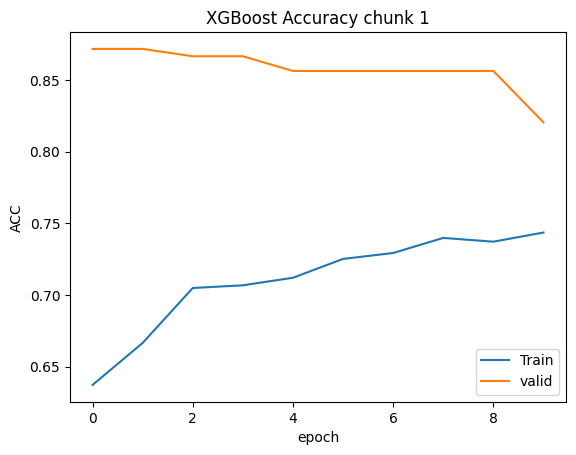

2
Accuracy: 37.99%
0.5895341022665916


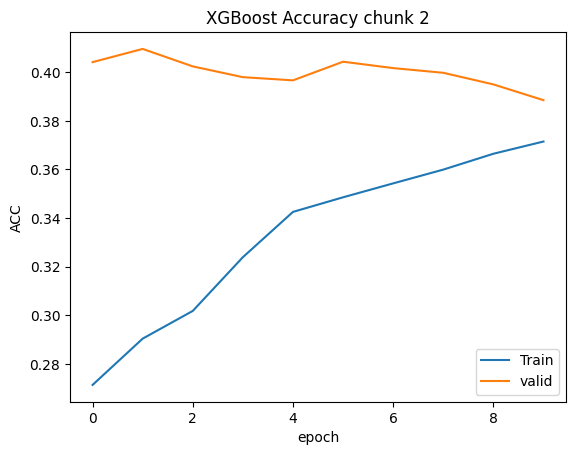

3
Accuracy: 39.84%
0.5258149126877668


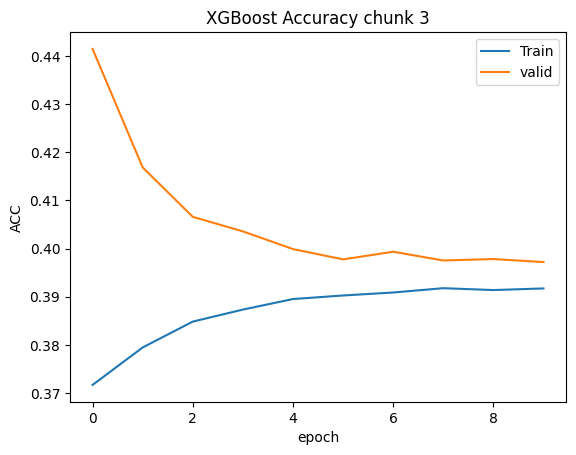

4
Accuracy: 39.42%
0.49291921202422345


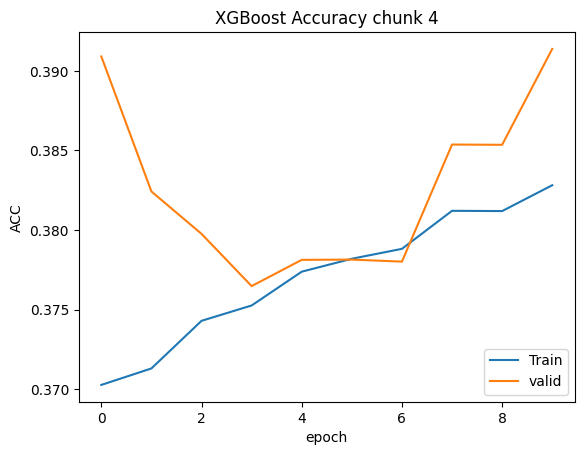

5
Accuracy: 34.67%
0.4636717359007553


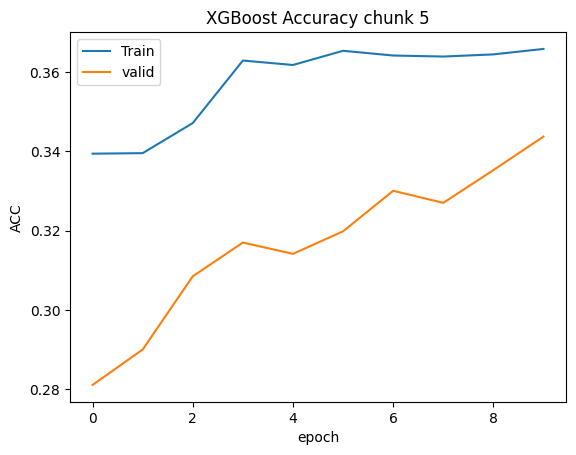

6
Accuracy: 34.98%
0.4446923693942599


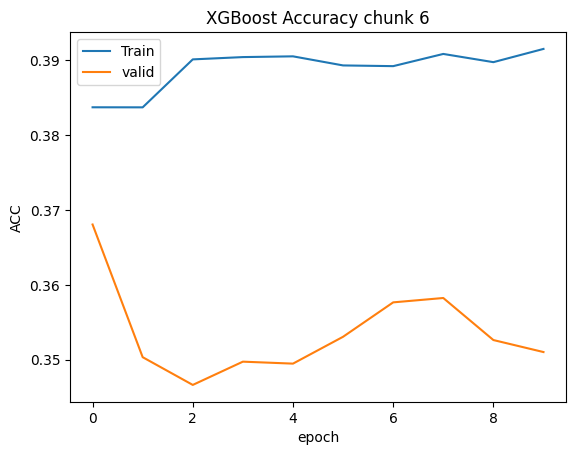

7
Accuracy: 43.65%
0.4435274164771768


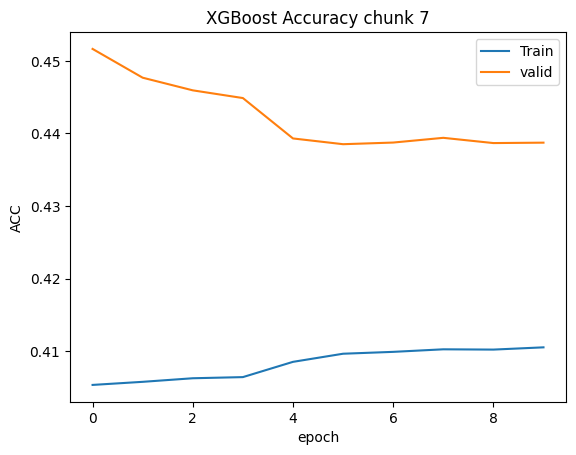

8
Accuracy: 32.74%
0.4290068303894615


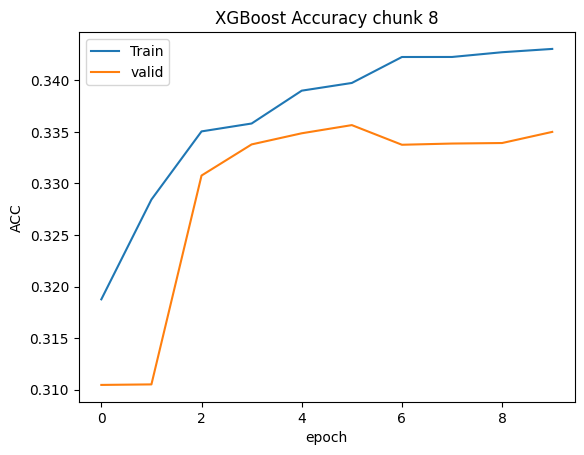

9
Accuracy: 38.20%
0.42378261384130156


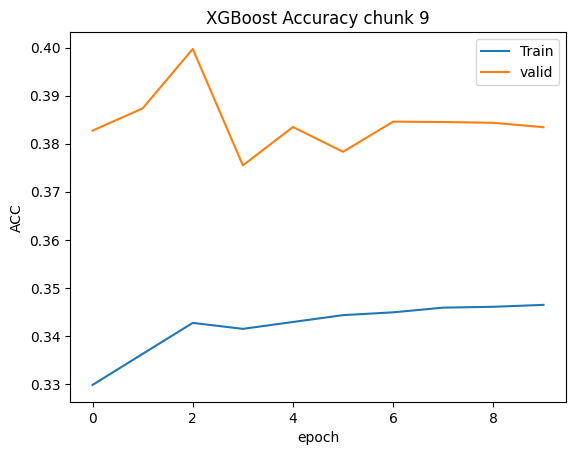

10
Accuracy: 37.51%
0.41891068798682163


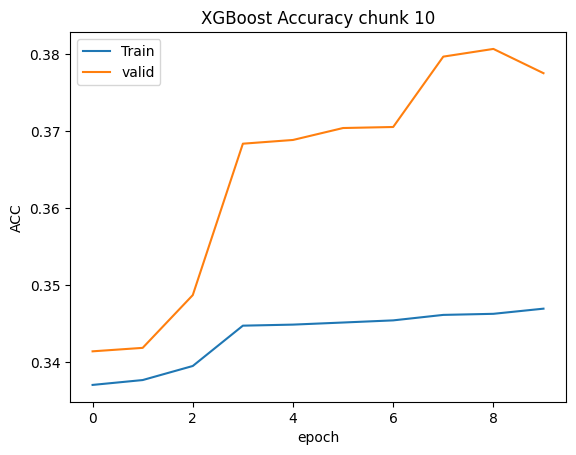

11
Accuracy: 38.12%
0.4154812813163717


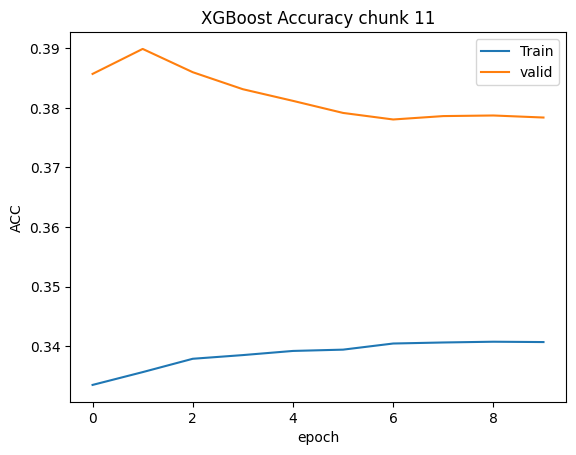

12
Accuracy: 37.09%
0.4117687031533331


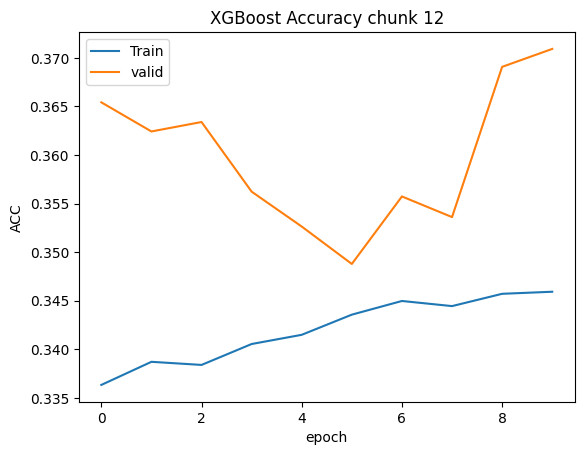

13
Accuracy: 41.09%
0.41170136439084903


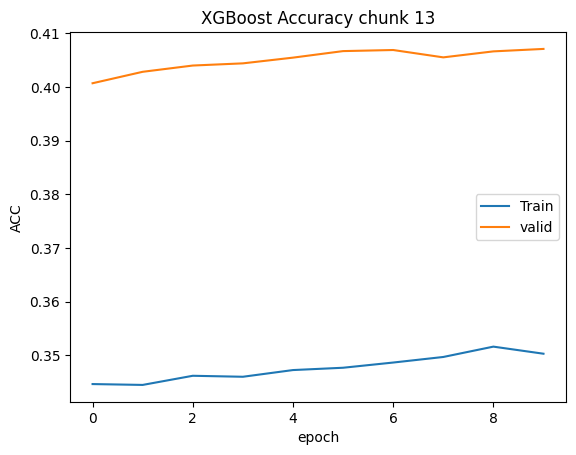

14
Accuracy: 33.92%
0.40652230257847993


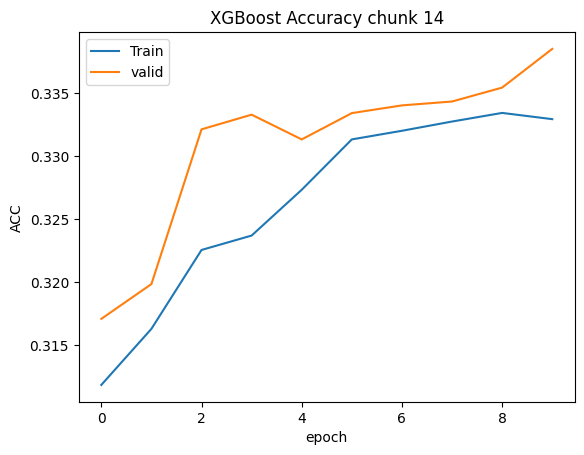

15
Accuracy: 53.10%
0.41482197372171775


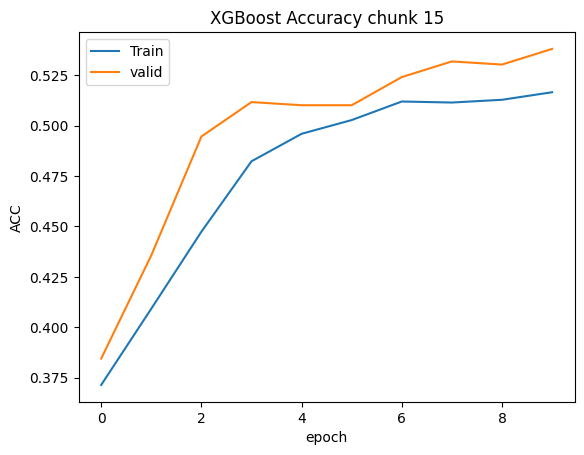

<ipython-input-14-b55cca2a307e>:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(results) , np.array(acc) ,np.array(y_pred),np.array(y_true),np.array(f1s),np.array(precisions),np.array(recalls),np.array(aucs)


In [ ]:
increamental_XGB_with_MICE_imputation_SMOTE = train_xgboost(resampled_chunks,xtest,ytest,xvalid,yvalid)
increamental_XGB_with_MICE_imputation_SMOTE_results = {}
increamental_XGB_with_MICE_imputation_SMOTE_results['curves'] = increamental_XGB_with_MICE_imputation_SMOTE[0]
increamental_XGB_with_MICE_imputation_SMOTE_results['acc'] = increamental_XGB_with_MICE_imputation_SMOTE[1]
increamental_XGB_with_MICE_imputation_SMOTE_results['y_pred'] = increamental_XGB_with_MICE_imputation_SMOTE[2]
increamental_XGB_with_MICE_imputation_SMOTE_results['y_true'] = increamental_XGB_with_MICE_imputation_SMOTE[3]
increamental_XGB_with_MICE_imputation_SMOTE_results['f1'] = increamental_XGB_with_MICE_imputation_SMOTE[4]
increamental_XGB_with_MICE_imputation_SMOTE_results['precision'] = increamental_XGB_with_MICE_imputation_SMOTE[5]
increamental_XGB_with_MICE_imputation_SMOTE_results['recall'] = increamental_XGB_with_MICE_imputation_SMOTE[6]
increamental_XGB_with_MICE_imputation_SMOTE_results['auc'] = increamental_XGB_with_MICE_imputation_SMOTE[7]

with open('increamental_XGB_with_MICE_imputation_SMOTE_results.pkl', "wb") as file:
    pickle.dump(increamental_XGB_with_MICE_imputation_SMOTE_results, file)

!cp -r '/content/increamental_XGB_with_MICE_imputation_SMOTE_results.pkl' '/content/drive/MyDrive/Covid results'

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
from scipy import sparse
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Masking
tf.random.set_seed(1)

def train_mlp(resampled_chunks,xtest,ytest,xvalid,yvalid, fs_masks=None,mask =True):
    acc = []
    f1s=[]
    precisions =[]
    recalls=[]
    aucs=[]
    # Create logistic regression model
    model = Sequential()
    if mask:
      model.add(Masking(mask_value=-1, input_shape=(resampled_chunks[0][0].shape[1],)))
      model.add(Dense(64, activation='relu'))
    else:
      model.add(Dense(64, activation='relu', input_shape=(resampled_chunks[0][0].shape[1],)))
    # input_dim is the number of features in your data
    model.add(Dense(32, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    # num_classes is the number of classes in your classification problem
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    classifier = model
    # MLPClassifier(
    #       activation="relu",
    #       max_iter=100,
    #       validation_fraction=0.2,
    #       early_stopping=True,
    #       random_state=42,verbose=True)
    results = []
    y_pred = []
    y_true = []
    for i in range(len(resampled_chunks)):
        # # Define your data and masks
        # X = df_list[i].values
        # # Define your labels
        # y = y_df_list[i]
        if fs_masks is not None:
          print(X)
          X = np.where(np.array(fs_masks[i]) == 0, -1, X)
          print(fs_masks[i])
          print(X)
        # Split the data into training and testing sets
        # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        # X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

        X_train = resampled_chunks[i][0]
        y_train = resampled_chunks[i][1]

        X_test = xtest[i]
        y_test = ytest[i]

        X_val = xvalid[i]
        y_val = yvalid[i]

        # if fs_masks is not None:
        #     masks_train = [fs_masks[i]] * len(X_train)
        #     masks_val = [fs_masks[i]] * len(X_val)
        #     masks_test = [fs_masks[i]] * len(X_test)

        #     # Apply masks to input data
        #     X_train_masked = X_train * masks_train
        #     X_val_masked = X_val * masks_val
        #     X_test_masked = X_test * masks_test
        # else:
        X_train_masked = X_train
        X_val_masked = X_val
        X_test_masked = X_test

        # # Convert masked data to sparse matrix
        # X_train_sparse = sparse.csr_matrix(X_train_masked)
        # X_val_sparse = sparse.csr_matrix(X_val_masked)
        # X_test_sparse = sparse.csr_matrix(X_test_masked)



        # Train logistic regression model on masked data
        history = classifier.fit(X_train_masked, y_train,validation_data=(X_val_masked,y_val),batch_size=int(X_train_masked.shape[0]*0.1),epochs=10,verbose=False)

        # print(mlp.score(X_train,y_train))


        # Make predictions on masked test data
        # preds = classifier.predict(X_test_masked)

        # Evaluate the accuracy of the model
        loss, accuracy = model.evaluate(X_test_masked, y_test)
        print("Accuracy: %.2f%%" % (accuracy * 100.0))
        acc.append(accuracy)
        print(np.mean(acc))
        preds = np.argmax(model.predict(X_test_masked), axis=-1)
        y_pred.append(preds)
        y_true.append(y_test)

        # Calculate F1 score
        f1 = f1_score(y_test, preds, average='weighted')
        f1s.append(f1)

        # Calculate precision
        precision = precision_score(y_test, preds, average='weighted')
        precisions.append(precision)

        # Calculate recall
        recall = recall_score(y_test, preds, average='weighted')
        recalls.append(recall)

        # Calculate AUC

        # Binarize the true labels
        y_true_binarized = label_binarize(y_test, classes=np.unique(y_test))

        # Calculate AUC for each class
        n_classes = len(np.unique(y_test))
        auc_scores = []

        for j in range(n_classes):
            y_true_j = y_true_binarized[:, j]     # True labels for class i
            y_pred_j = (preds == j).astype(int)  # Predicted labels for class i
            auc_j = roc_auc_score(y_true_j, y_pred_j)
            wighted_auc_j = ((preds==j).sum()/len(preds)) * auc_j
            auc_scores.append(auc_j)

        # Average the AUC scores
        mean_auc = np.mean(auc_scores)
        aucs.append(mean_auc)

        # Plot accuracy over epochs
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Logistic Regression Accuracy chunk {i+1}')
        plt.show()
        results.append((history.history['accuracy'],history.history['val_accuracy']))
    return np.array(results) , np.array(acc) ,np.array(y_pred),np.array(y_true),np.array(f1s),np.array(precisions),np.array(recalls),np.array(aucs)

8/8 [==============================] - 0s 2ms/step - loss: 1.0438 - accuracy: 0.4877
Accuracy: 48.77%
0.48770493268966675
8/8 [==============================] - 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


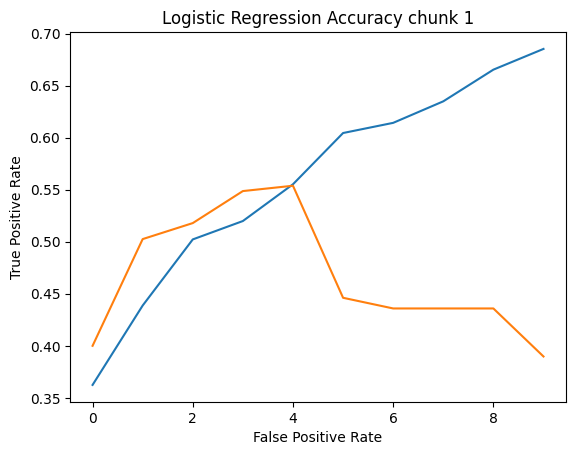

892/892 [==============================] - 1s 1ms/step - loss: 1.3268 - accuracy: 0.3308
Accuracy: 33.08%
0.40926942229270935
892/892 [==============================] - 1s 1ms/step


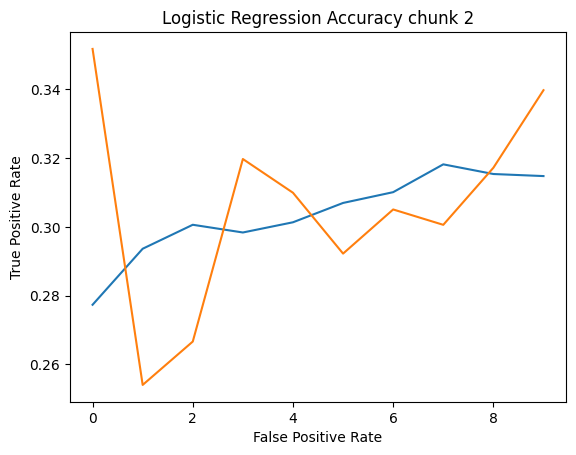

1694/1694 [==============================] - 2s 1ms/step - loss: 1.3073 - accuracy: 0.3952
Accuracy: 39.52%
0.40458689133326214
1694/1694 [==============================] - 2s 1ms/step


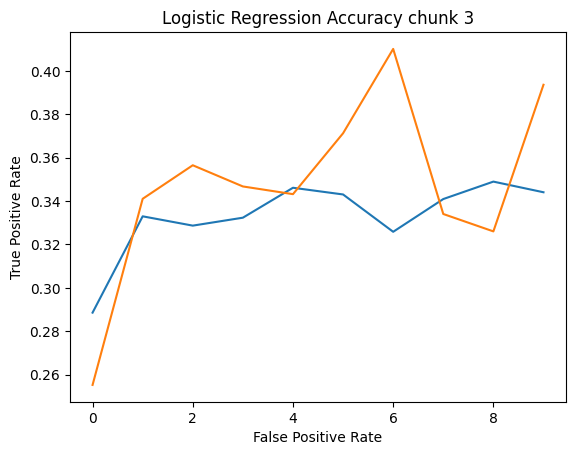

2466/2466 [==============================] - 3s 1ms/step - loss: 1.3310 - accuracy: 0.3825
Accuracy: 38.25%
0.3990730494260788
2466/2466 [==============================] - 3s 1ms/step


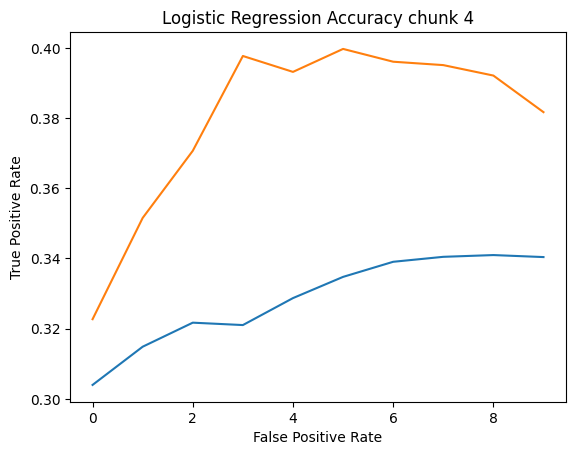

2363/2363 [==============================] - 3s 1ms/step - loss: 1.3686 - accuracy: 0.2722
Accuracy: 27.22%
0.37369545102119445
2363/2363 [==============================] - 2s 1ms/step


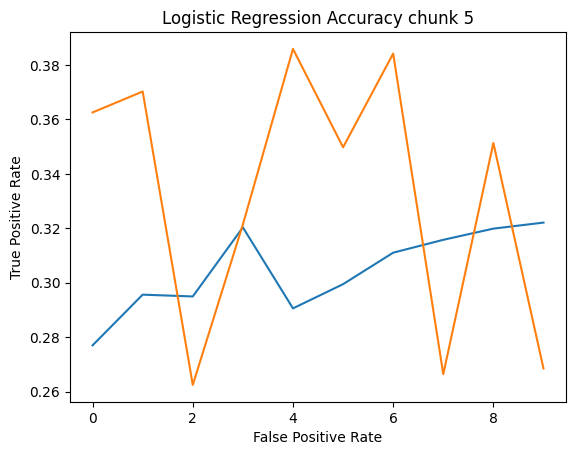

2675/2675 [==============================] - 4s 1ms/step - loss: 1.3321 - accuracy: 0.3431
Accuracy: 34.31%
0.36858855684598285
2675/2675 [==============================] - 3s 1ms/step


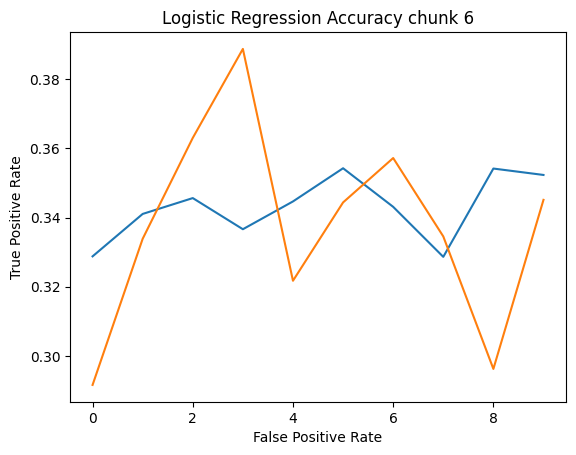

2759/2759 [==============================] - 4s 1ms/step - loss: 1.2562 - accuracy: 0.4378
Accuracy: 43.78%
0.3784817031451634
2759/2759 [==============================] - 3s 1ms/step


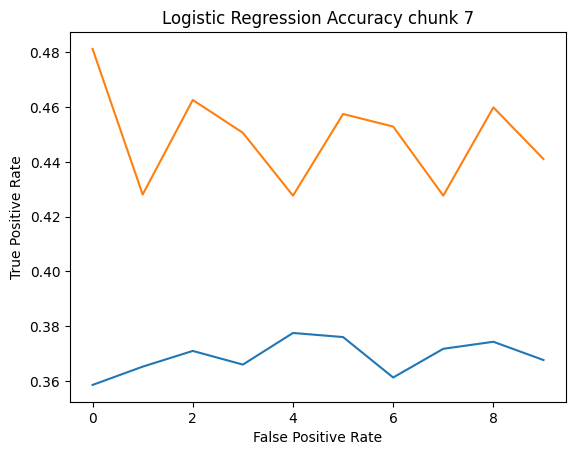

2317/2317 [==============================] - 3s 1ms/step - loss: 1.3265 - accuracy: 0.3141
Accuracy: 31.41%
0.3704395741224289
2317/2317 [==============================] - 2s 1ms/step


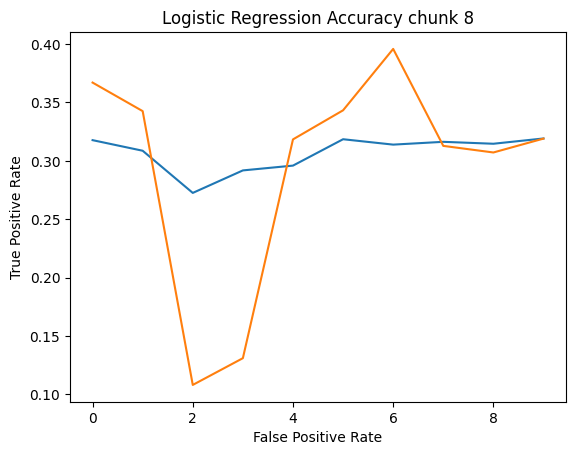

6774/6774 [==============================] - 9s 1ms/step - loss: 1.3394 - accuracy: 0.3885
Accuracy: 38.85%
0.372442536883884
6774/6774 [==============================] - 7s 1ms/step


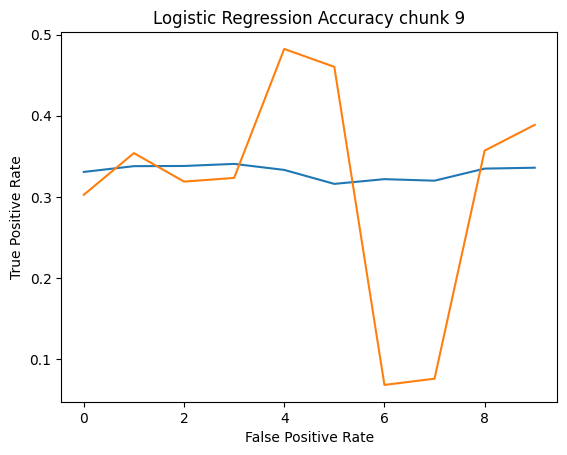

2343/2343 [==============================] - 3s 1ms/step - loss: 1.3516 - accuracy: 0.3695
Accuracy: 36.95%
0.37215242683887484
2343/2343 [==============================] - 3s 1ms/step


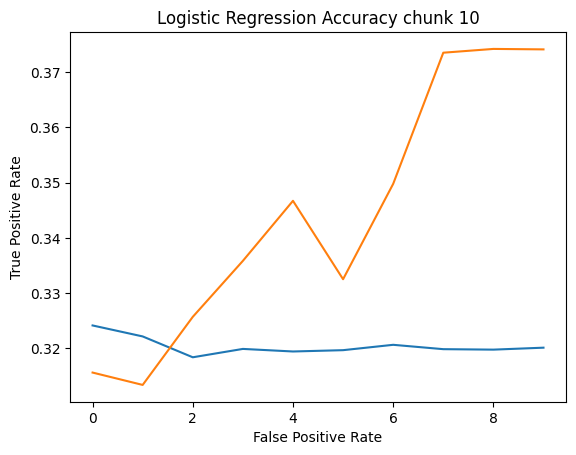

2738/2738 [==============================] - 4s 1ms/step - loss: 1.3545 - accuracy: 0.3398
Accuracy: 33.98%
0.36921494928273285
2738/2738 [==============================] - 3s 1ms/step


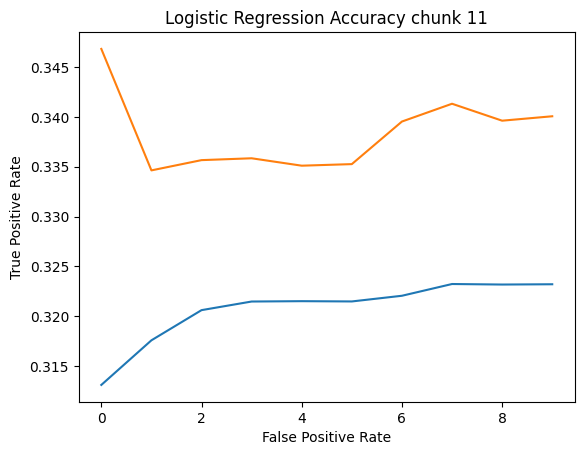

1968/1968 [==============================] - 2s 1ms/step - loss: 1.3554 - accuracy: 0.2930
Accuracy: 29.30%
0.3628610074520111
1968/1968 [==============================] - 2s 1ms/step


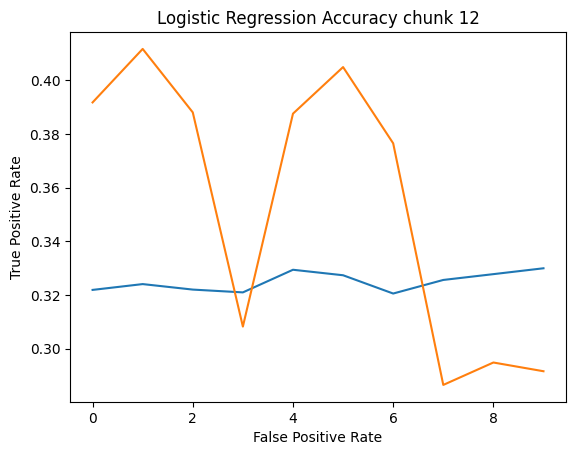

770/770 [==============================] - 1s 1ms/step - loss: 1.2828 - accuracy: 0.4475
Accuracy: 44.75%
0.3693718474644881
770/770 [==============================] - 1s 1ms/step


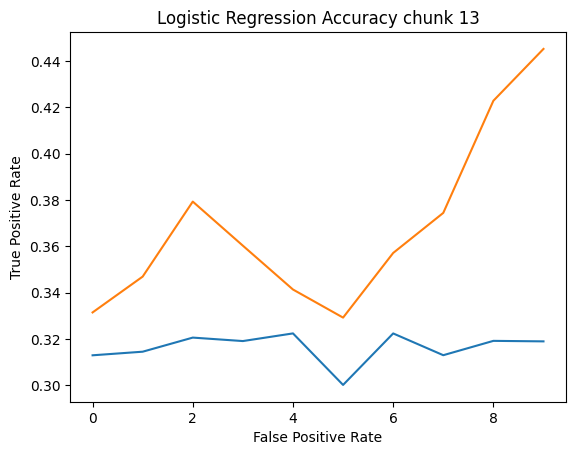

637/637 [==============================] - 1s 1ms/step - loss: 1.3514 - accuracy: 0.2977
Accuracy: 29.77%
0.36425533464976717
637/637 [==============================] - 1s 1ms/step


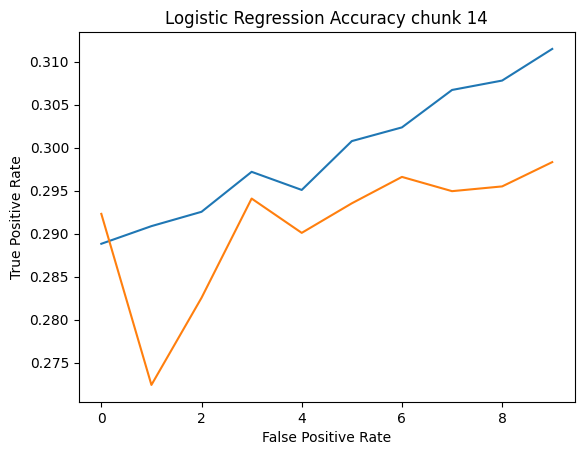

26/26 [==============================] - 0s 2ms/step - loss: 1.2649 - accuracy: 0.4082
Accuracy: 40.82%
0.3671842177708944
26/26 [==============================] - 0s 1ms/step


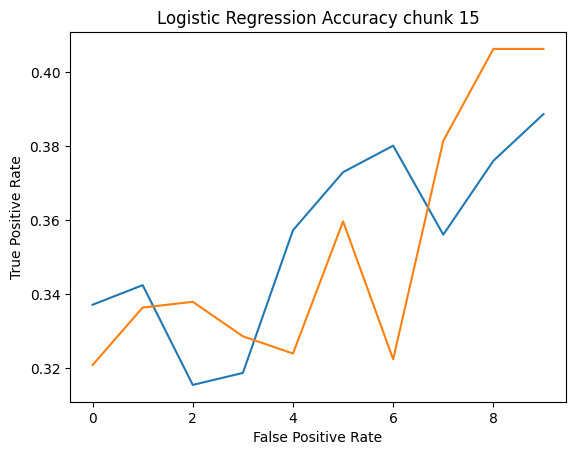

<ipython-input-16-7c3309e9f3e2>:147: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(results) , np.array(acc) ,np.array(y_pred),np.array(y_true),np.array(f1s),np.array(precisions),np.array(recalls),np.array(aucs)


In [ ]:
increamental_NN_with_MICE_imputation_SMOTE = train_mlp(resampled_chunks,xtest,ytest,xvalid,yvalid)
increamental_NN_with_MICE_imputation_SMOTE_results = {}
increamental_NN_with_MICE_imputation_SMOTE_results['curves'] = increamental_NN_with_MICE_imputation_SMOTE[0]
increamental_NN_with_MICE_imputation_SMOTE_results['acc'] = increamental_NN_with_MICE_imputation_SMOTE[1]
increamental_NN_with_MICE_imputation_SMOTE_results['y_pred'] = increamental_NN_with_MICE_imputation_SMOTE[2]
increamental_NN_with_MICE_imputation_SMOTE_results['y_true'] = increamental_NN_with_MICE_imputation_SMOTE[3]
increamental_NN_with_MICE_imputation_SMOTE_results['f1'] = increamental_NN_with_MICE_imputation_SMOTE[4]
increamental_NN_with_MICE_imputation_SMOTE_results['precision'] = increamental_NN_with_MICE_imputation_SMOTE[5]
increamental_NN_with_MICE_imputation_SMOTE_results['recall'] = increamental_NN_with_MICE_imputation_SMOTE[6]
increamental_NN_with_MICE_imputation_SMOTE_results['auc'] = increamental_NN_with_MICE_imputation_SMOTE[7]

with open('increamental_NN_with_MICE_imputation_SMOTE_results.pkl', "wb") as file:
    pickle.dump(increamental_NN_with_MICE_imputation_SMOTE_results, file)

!cp -r '/content/increamental_NN_with_MICE_imputation_SMOTE_results.pkl' '/content/drive/MyDrive/Covid results'